# DEFINITIONS OF AMBER ASSESSMENT MEASURES

It is not quite clear different measures of AMBER evaluation as definitions in relavent papers uses alternative terms. This document helps to clarify AMBER measures with respect to base pairs which is considered to be effective.


## 1) MAPPING

Type 1 (map bin to a genome that best represents the bin): map every bin to the most abundant genome in that bin in terms of number of base pairs (length).

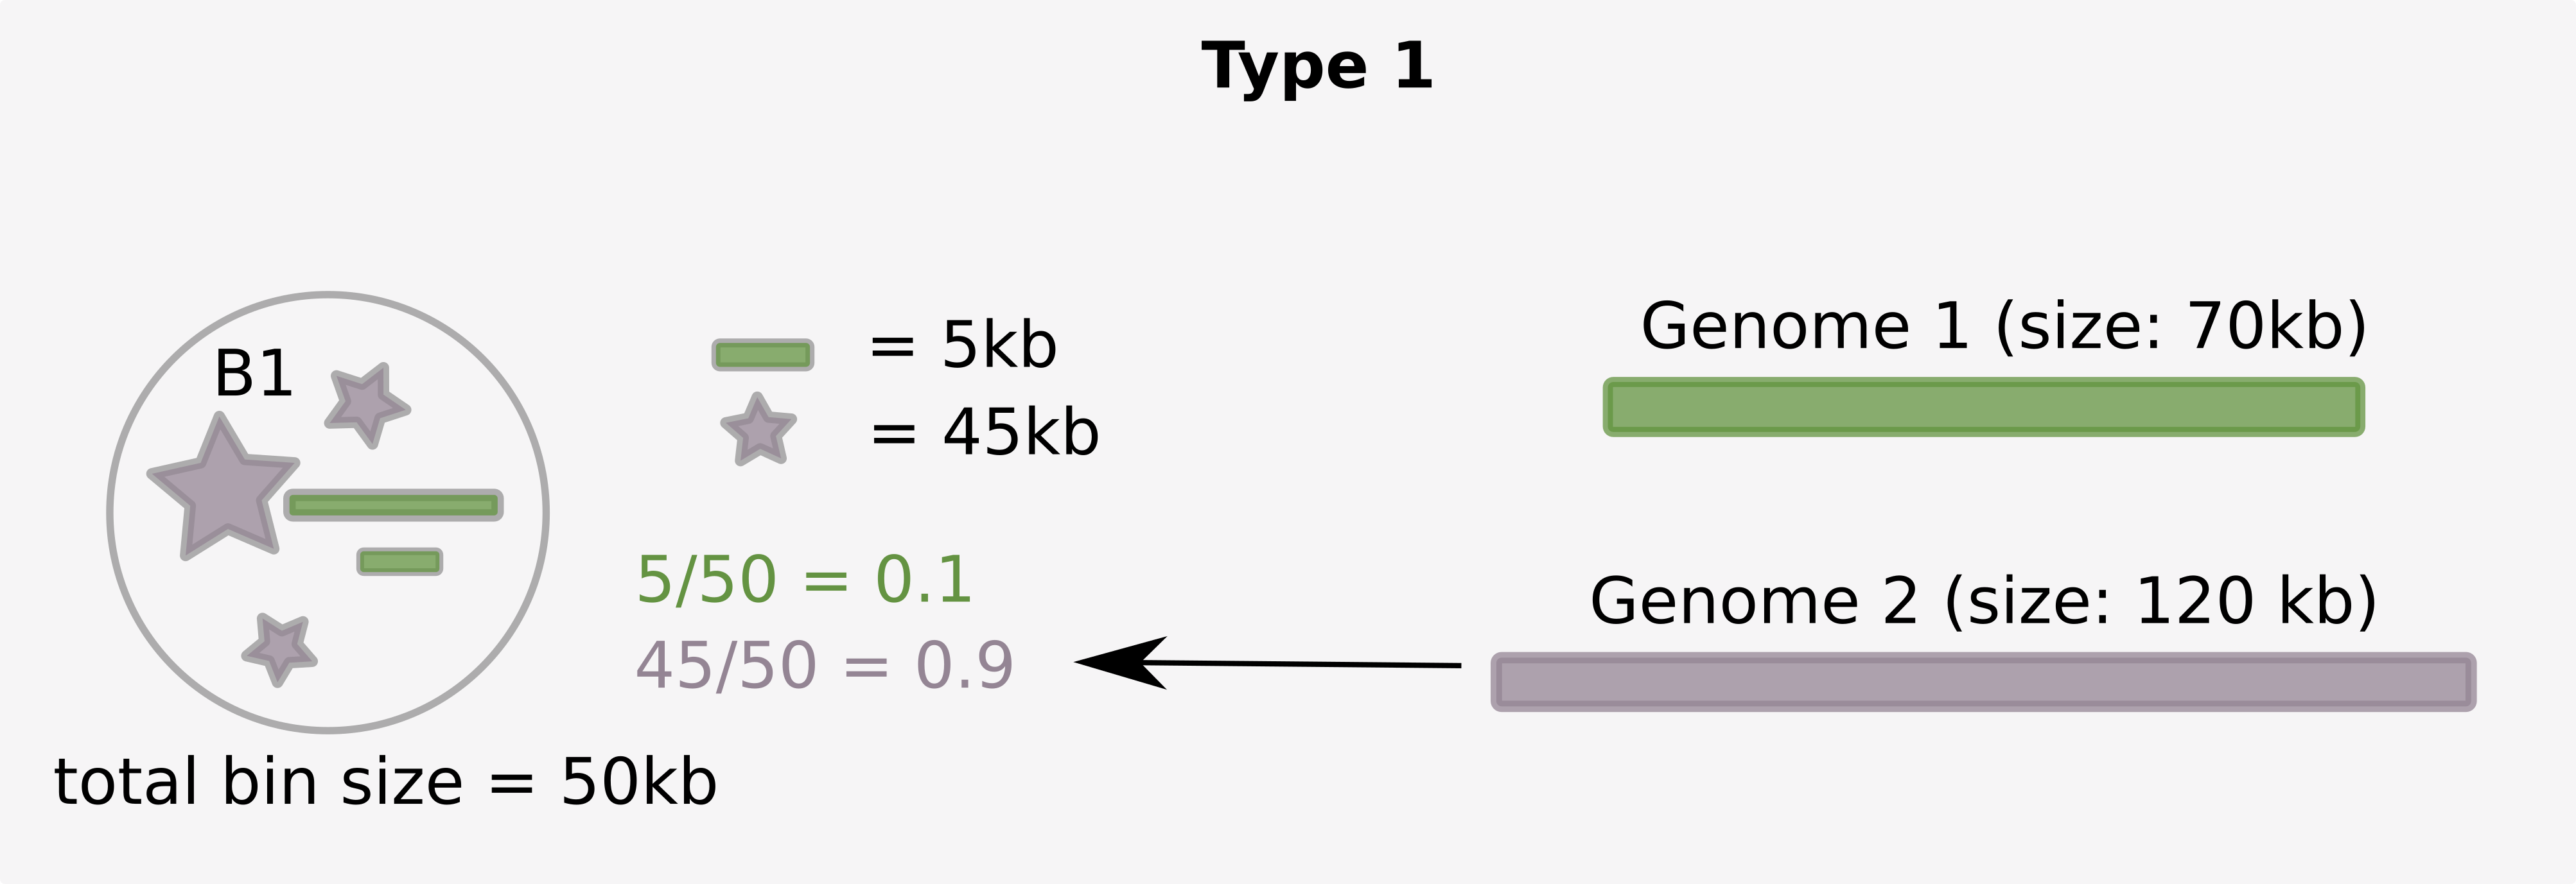

This mapping is used to compute purity, accuracy, ARI, CAMI 1 F1 score and CAMI 1 completeness. Measures from this mapping are stored in `metrics_per_bin.tsv` in genome/tool folder and `bin_metrics.tsv`


Type 2 (map genome to a bin that best represent genome): map every genome to a bin that has the largest fraction of its base pairs. 

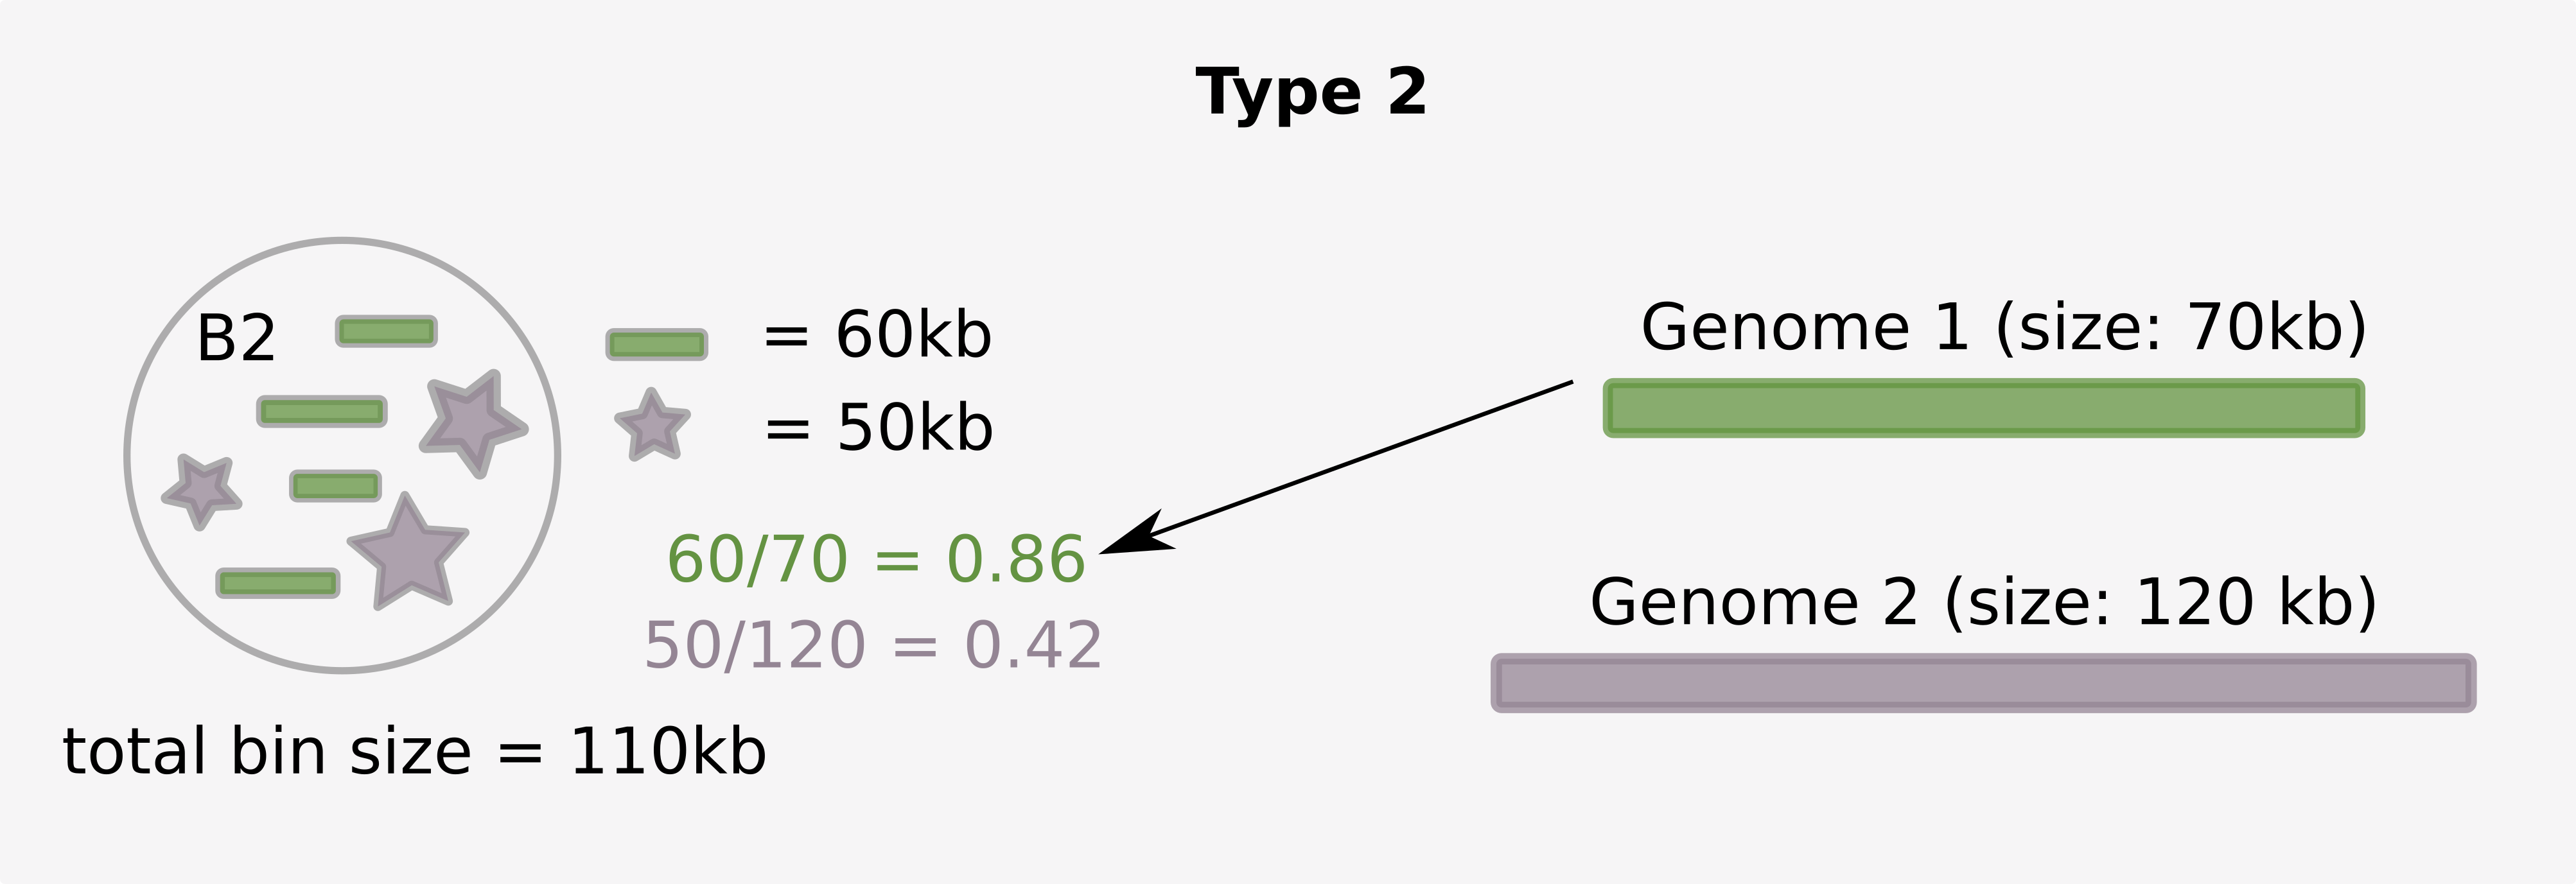

Type 2 mapping is used to compute recall/completess for each genome and accuracy of overall binning. Average completeness is written in `results.tsv`. Metrics from this mapping are not saved in text file from AMBER run.

## 2) PURITY (bp)
The ratio of overlapping length of mapped genome (TP) to the total bin length (TP + FP). 

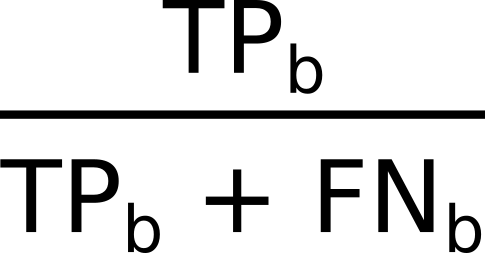


TP<sub>b</sub> - total length overlapping contigs between mapped genome and a given bin

FP<sub>b</sub> - total length of non-overlapping contigs in that given bin 

Here, **type 1** mapping is used. Purity is calculated for every bin. Average over all bins is given as average purity in `results.tsv` output file.


Contamination = 1 - purity


Average purity = sum purity over all bins / total number of bins (averaged over bins)


## 3) ACCURACY (bp)

Average assignment quality per base pair over the entire dataset

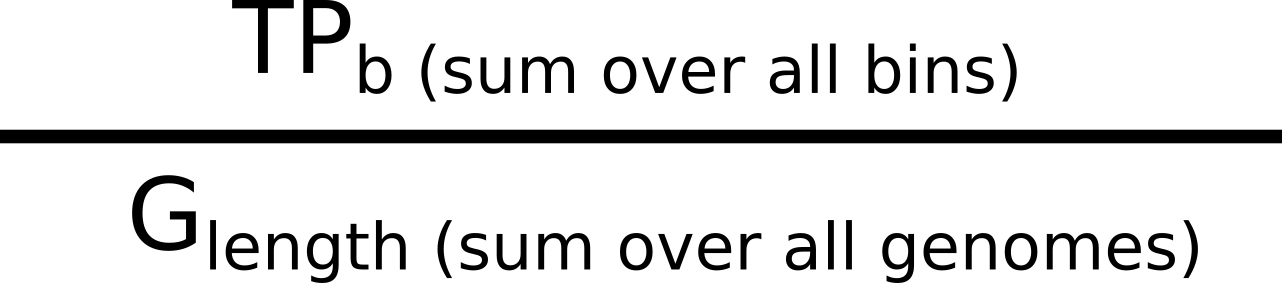

TP<sub>b</sub> - total length of overlapping contigs between mapped genome and a given bin (based on type 1 mapping) and sum over all bins.

G<sub>length</sub> - total length of all genomes in the dataset

Here, the numerator comes from type 1 mapping while the denominator comes from type 2 mapping. Hence average completeness and accuracy will have correlated trend in performance.

## 4) ADJUSTED RAND INDEX (bp)

Assess clustering of entire assigned portion

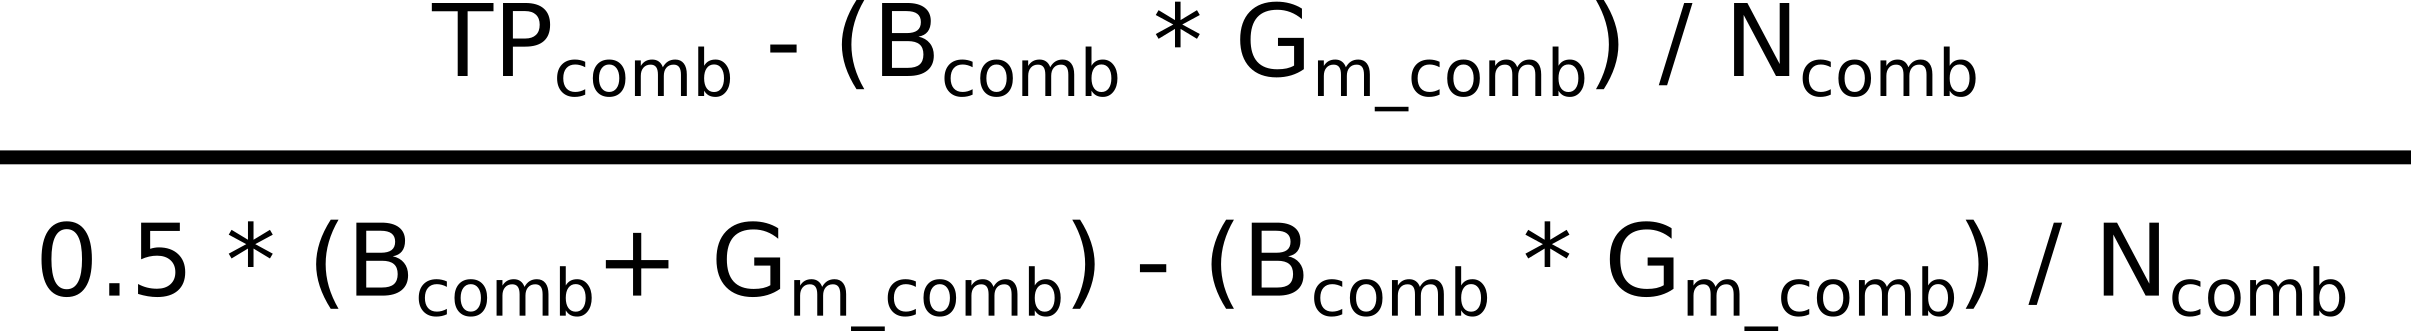

TP<sub>comb</sub> - all base pairs combinations of total length of overlapped contigs between mapped genome and bin. This is summed over all pairs of mapped genome and bins. Mapping is done by **type 1**.

B<sub>comb</sub> - all base pair combinations of total length of bins and summed over all bins.

G<sub>m_comb</sub> - all base pair combinations of total length of genomes and summed over all mapped genomes. 

N<sub>comb</sub> - all base pair combinations of total length of assigned contigs

note: base pairs combinations is math.comb(length)


## 3) COMPLETENESS (bp)
The ratio of base pairs belong to mapped genome (TP) / total base pairs of mapped genome (TP + FN)

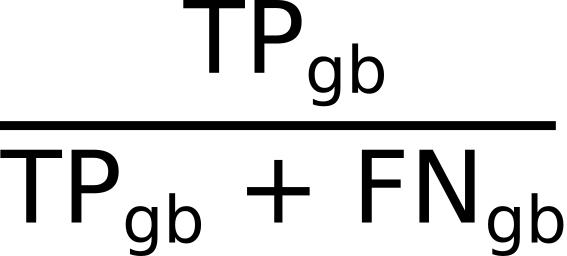


TP<sub>gb</sub> - total length of overlapped contigs between mapped genome and a given bin
FN<sub>gb</sub> - remaining total contigs of the mapped genome

Here, **type 2** mapping is performed. Average completeness given in `results.tsv` is obtained from this measure. The whole genome-wise completeness are not printed in amber output.

## 4) CAMI 1 COMPLETENESS (bp)
The formula is the same as (3) completeness (bp) but the mapped genome is defined based on **type 1**. Hence, the completeness is calculated for every bin.

Average CAMI 1 completeness is the sum of completeness over all bins divided by total genomes in the dataset. For all bin and unassigned genome, the measures are saved in `genome_metrics_cami1.tsv` by amber run.


## One to many mapping


When we take the fraction of overlapping length between genomes and bins with respect to total bin size (type 1), it is possible that a given genome is most abundant in more than one bin. This results in multiple bins mapped to one genome and each bin will have their CAMI 1 completeness. Since, CAMI 1 completeness is computed as the fraction of mapped genome covered in each bin, the sum over bins is equal to 1.

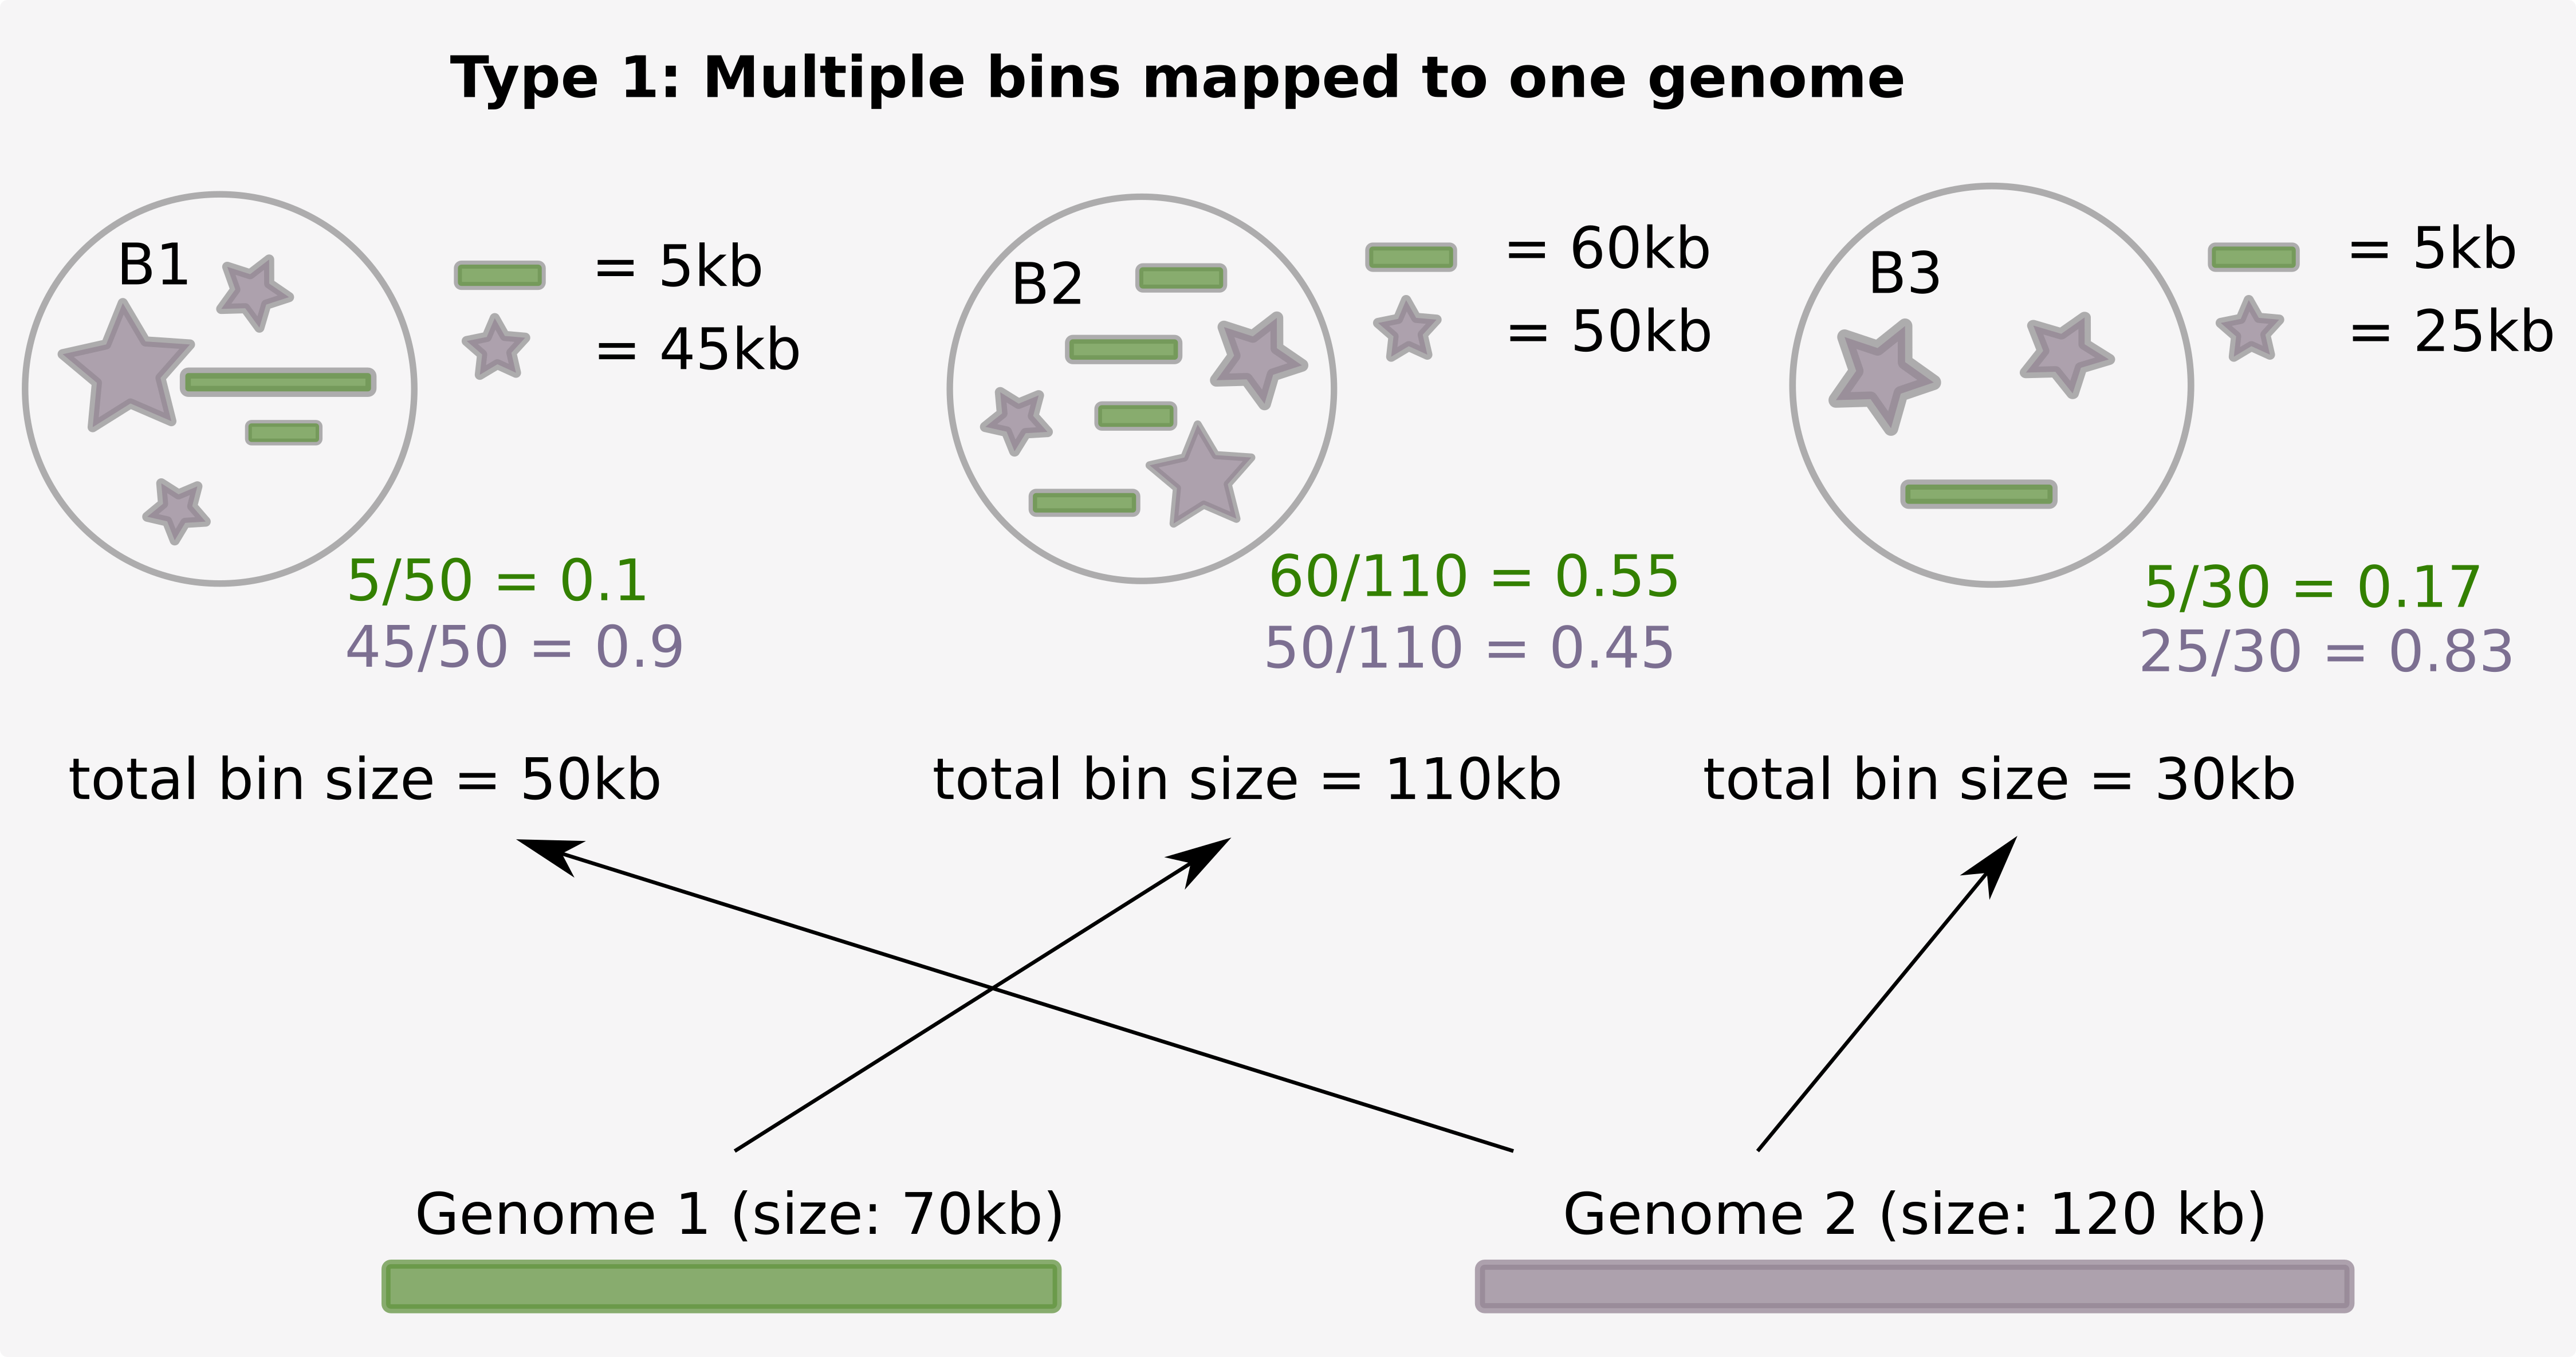




When we take the fraction of overlapping length between genomes and bins with respect to genome size (type 2), it is possible that more than one genome is abundant in one bin. This results in multiple genome mapped to one bin. Each genome will have completeness and hence single bin may contribute to multiple completeness values. Average over completeness of all genomes is given as average completess in `results.tsv` which is different from CAMI 1 average completeness. Highly contaminated bin will result in high completeness.

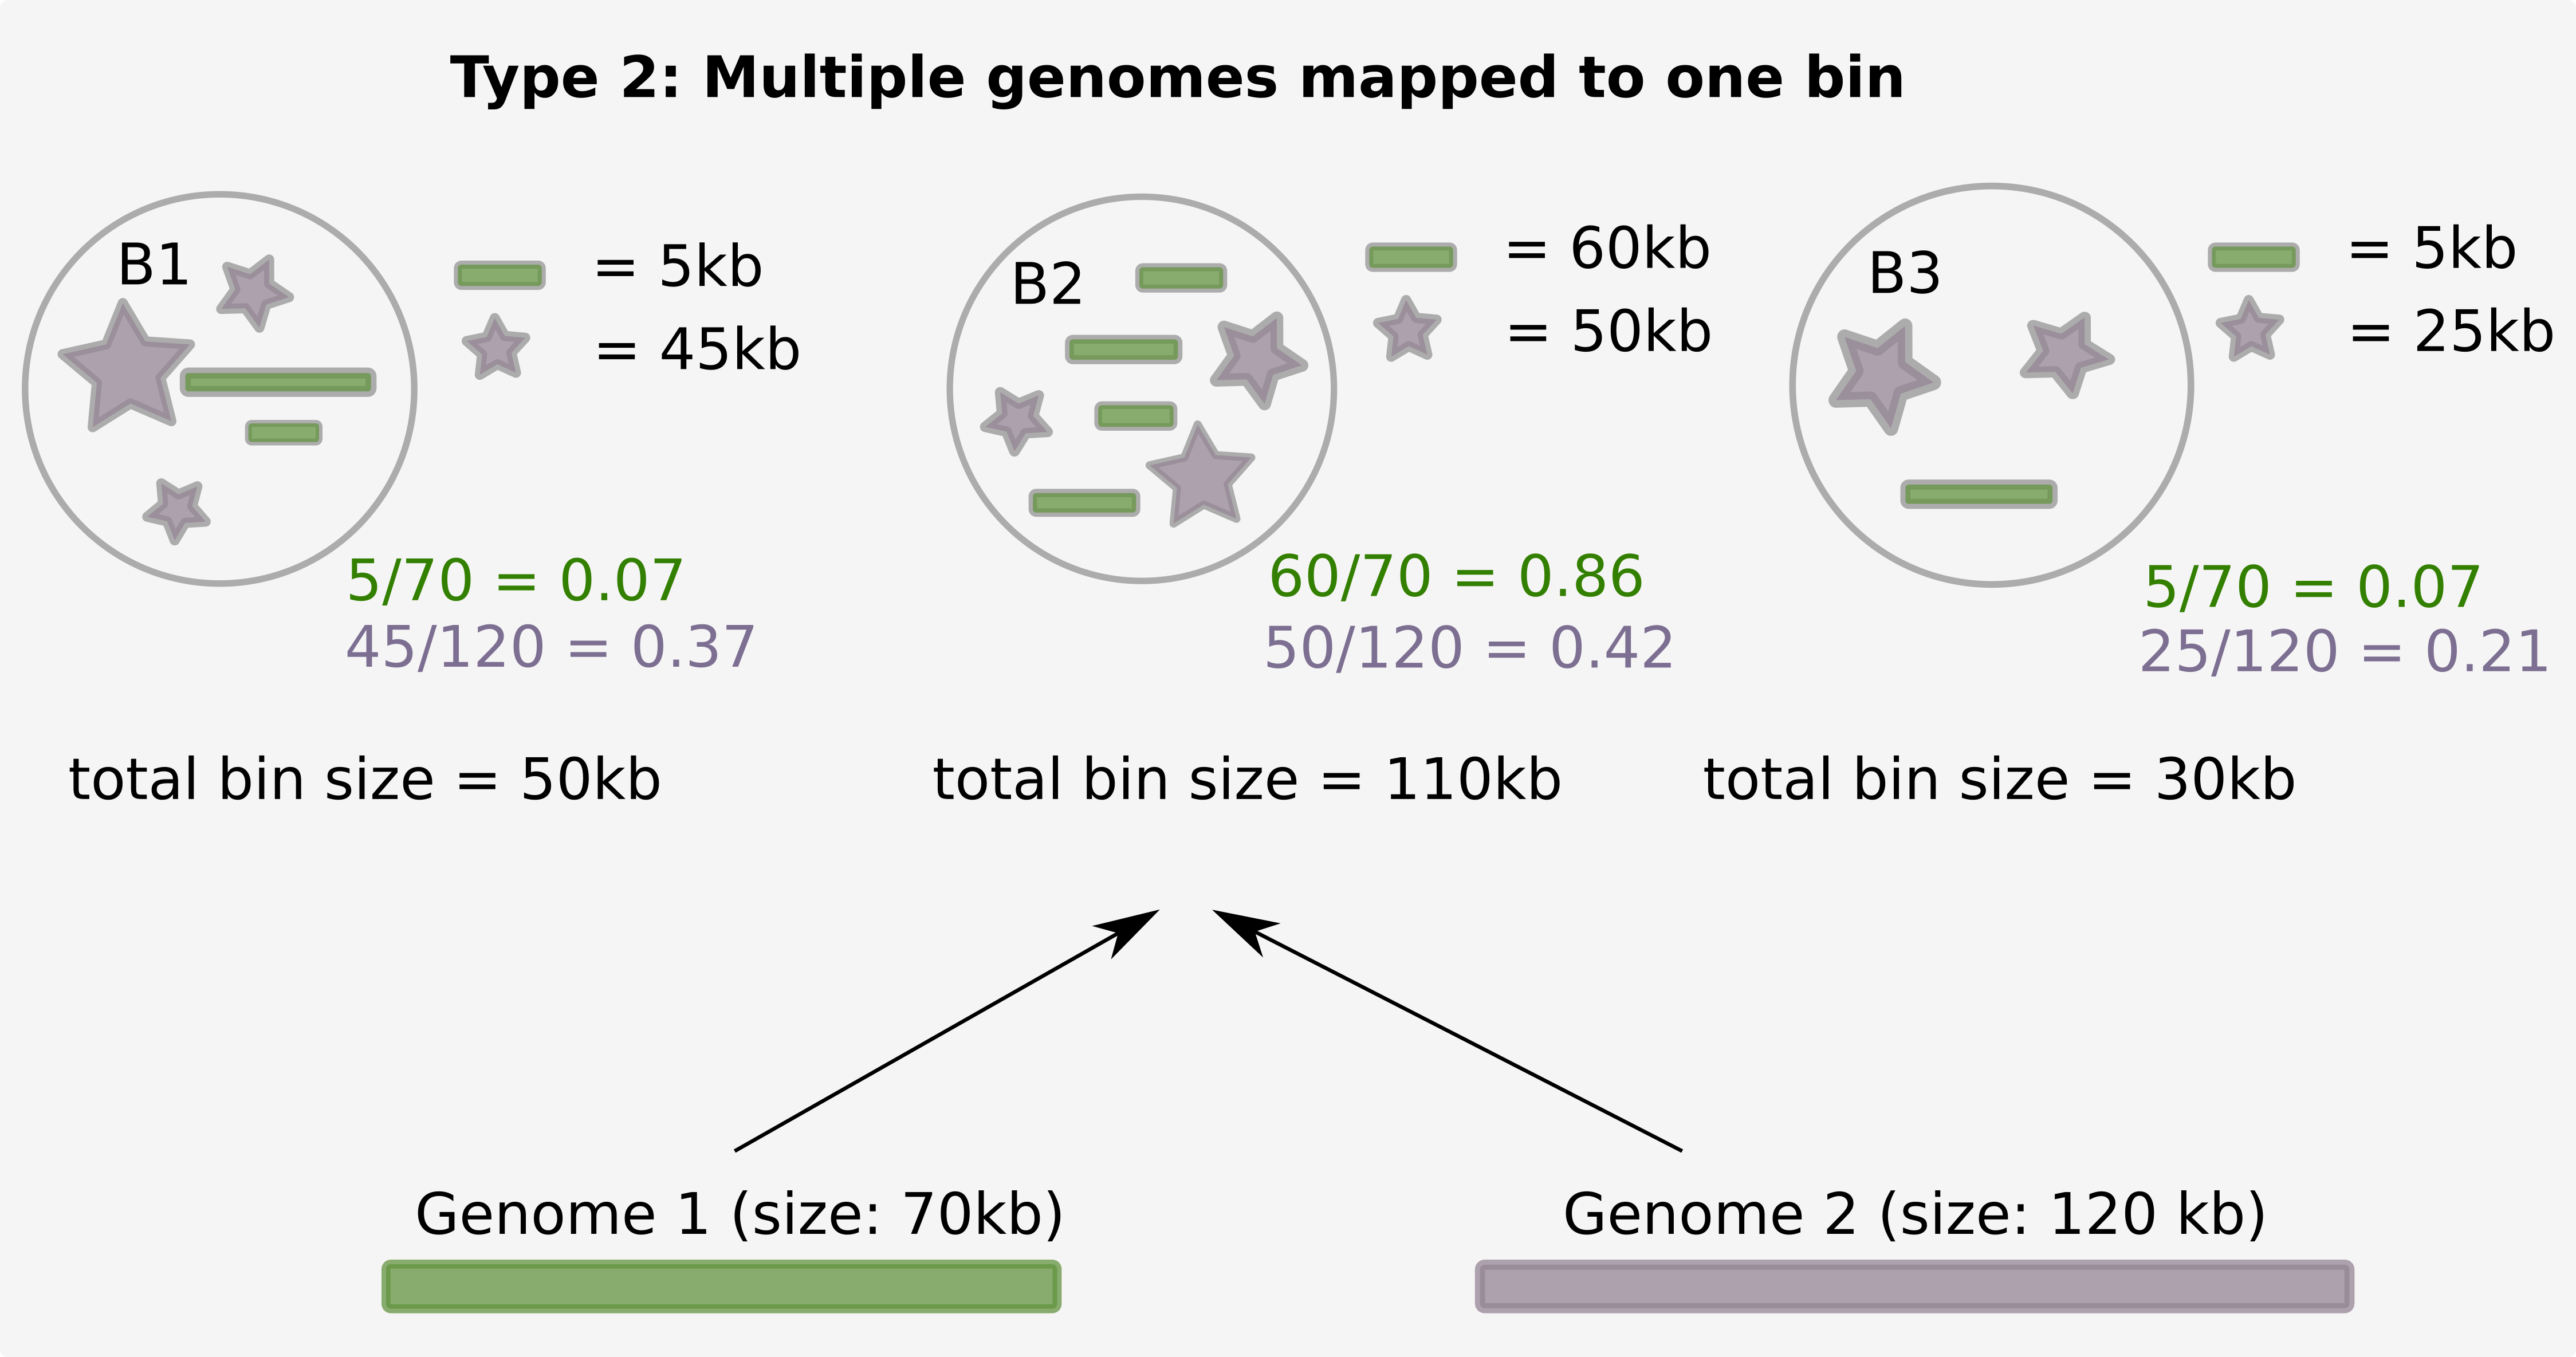

## Why Average completeness (bp) is reasonable while CAMI 1 average completeness (bp) is very low?

Ans: From the above illustration it is understandable that average completeness (bp) is based on type 2 mapping in which every genome is mapped a bin. Multiple genomes can be mapped to one bin. If a bin *b* comprises of two genomes, as per type 2 mapping, both genomes are mapped to bin *b*. We will have completeness ~1 for both genomes and average completeness is 1. Such events result in much higher average completeness (bp) compared to CAMI 1 average completeness.

CAMI 1 average completeness is based on type 1 mapping where each bin is mapped to only one genome. Taking the same scenario above, only one of the two genomes that has higher fraction of overall with bin size gets mapped to bin '*b*. Hence, completeness would be ~1 for that genome while the other will have ~0 completeness. Average over these two will result in 0.5.


If a bin comprises of multiple genomes (as linkage-based approach merge too many clusters), average completeness (bp) will be higher than CAMI 1 version as those genomes can be mapped to that bin and completeness is computed for all of the genomes. In the case of CAMI 1 completeness, only one genome is mapped and get completeness value while remaining genomes get zero completeness. When average over them, we get poor completeess.
